### 1. Import Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Read dataset

In [68]:
df = pd.read_csv("car data.csv")

#### 2.1 read first 5 rows

In [69]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### 2.2 check shape of the dataset

In [70]:
df.shape

(301, 9)

- There are 9 columns and 301 rows
- Selling_price is the dependent feature

#### 2.3 check info regarding dataset

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Year, Selling_Price, Present_Price, and Kms_Driven are numerical features. Rest are categorical features

#### 2.4 summary of data

In [72]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Just by looking at the summary above, we can conclude that there will be outliers in atleast Selling_Price, Present_Price, and Owner columns

#### 2.5 Check duplicates

In [73]:
df.duplicated().sum()

2

#### 2.6 Check the number of unique values of each column

In [74]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

#### 2.7 Check null values

In [75]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### 3. Exploratory Data Analysis

#### 3.1 Check categories inside categorical variables

In [76]:
print("Categories in Fuel_Type column: ",end=" ")
print(df["Fuel_Type"].unique())
print("\n")

print("Categories in Seller_Type column: ",end=" ")
print(df["Seller_Type"].unique())
print("\n")

print("Categories in Transmission column: ",end=" ")
print(df["Transmission"].unique())
print("\n")

print("Categories in Owner column: ",end=" ")
print(df["Owner"].unique())
print("\n")

Categories in Fuel_Type column:  ['Petrol' 'Diesel' 'CNG']


Categories in Seller_Type column:  ['Dealer' 'Individual']


Categories in Transmission column:  ['Manual' 'Automatic']


Categories in Owner column:  [0 1 3]




#### 3.2 Define categorical and Numerical features

In [77]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

###print columns
print(f"There are {len(numerical_features)} numerical features: {numerical_features}")
print(f"There are {len(categorical_features)} categorical_features features: {categorical_features}")

There are 5 numerical features: ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
There are 4 categorical_features features: ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


#### 3.3 Univariate Analysis

Taking one variable at a time and analysing it

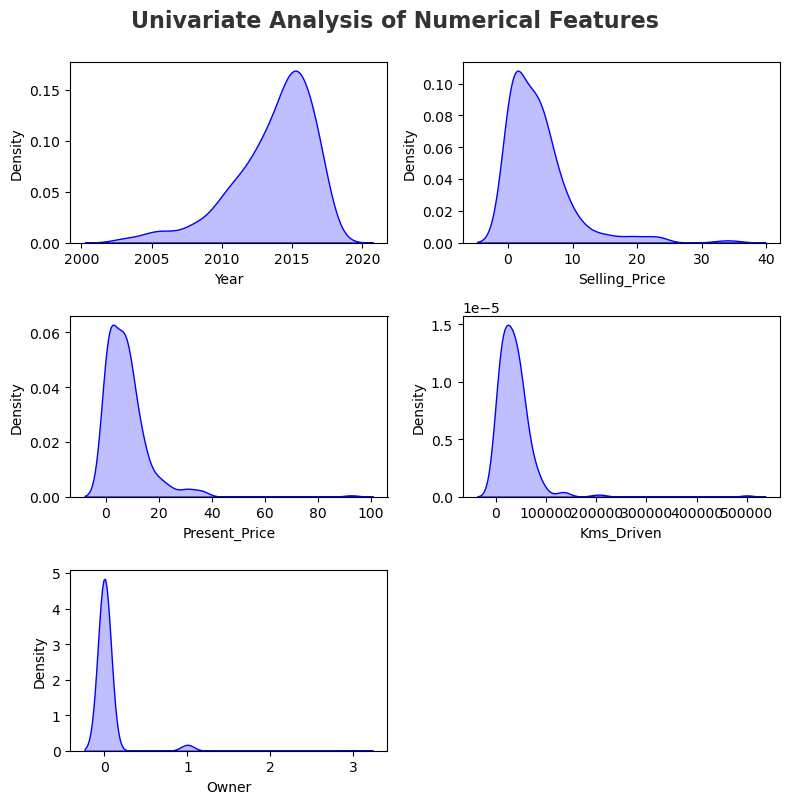

In [78]:
plt.figure(figsize = (8,8))

plt.suptitle("Univariate Analysis of Numerical Features",fontsize=16, fontweight='bold', alpha=0.8,y=1)

for i in range(len(numerical_features)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True,color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

plt.show()

- These fields are right skewed excpet Year columns... these features may have outliers

#### 3.4 Check Outliers

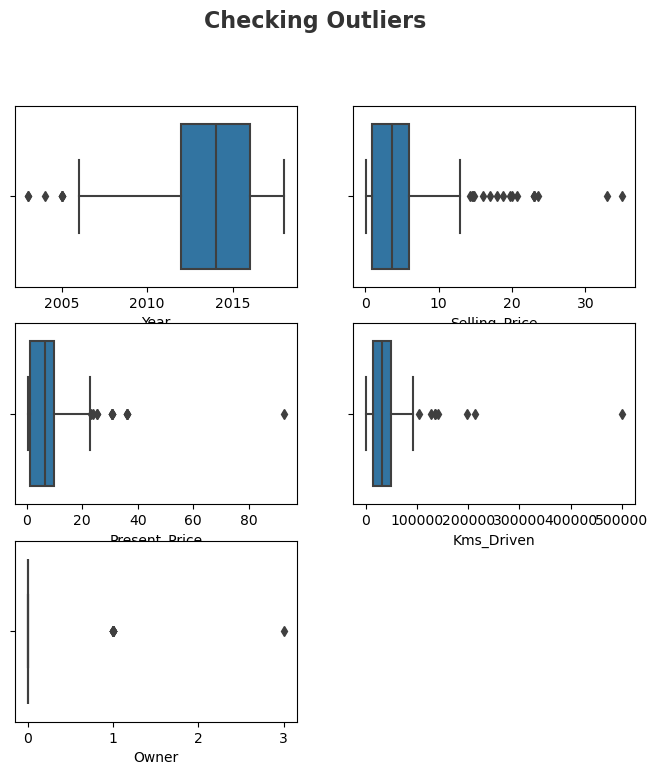

In [79]:
plt.figure(figsize = (8,8))
plt.suptitle("Checking Outliers",fontsize=16, fontweight='bold', alpha=0.8,y=1)

for i in range(len(numerical_features)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=numerical_features[i], data=df)
    plt.xlabel(numerical_features[i])

plt.show()

As I will use Ridge Regression, I won't deal with outliers right now.

#### 3.5 Categorical Features

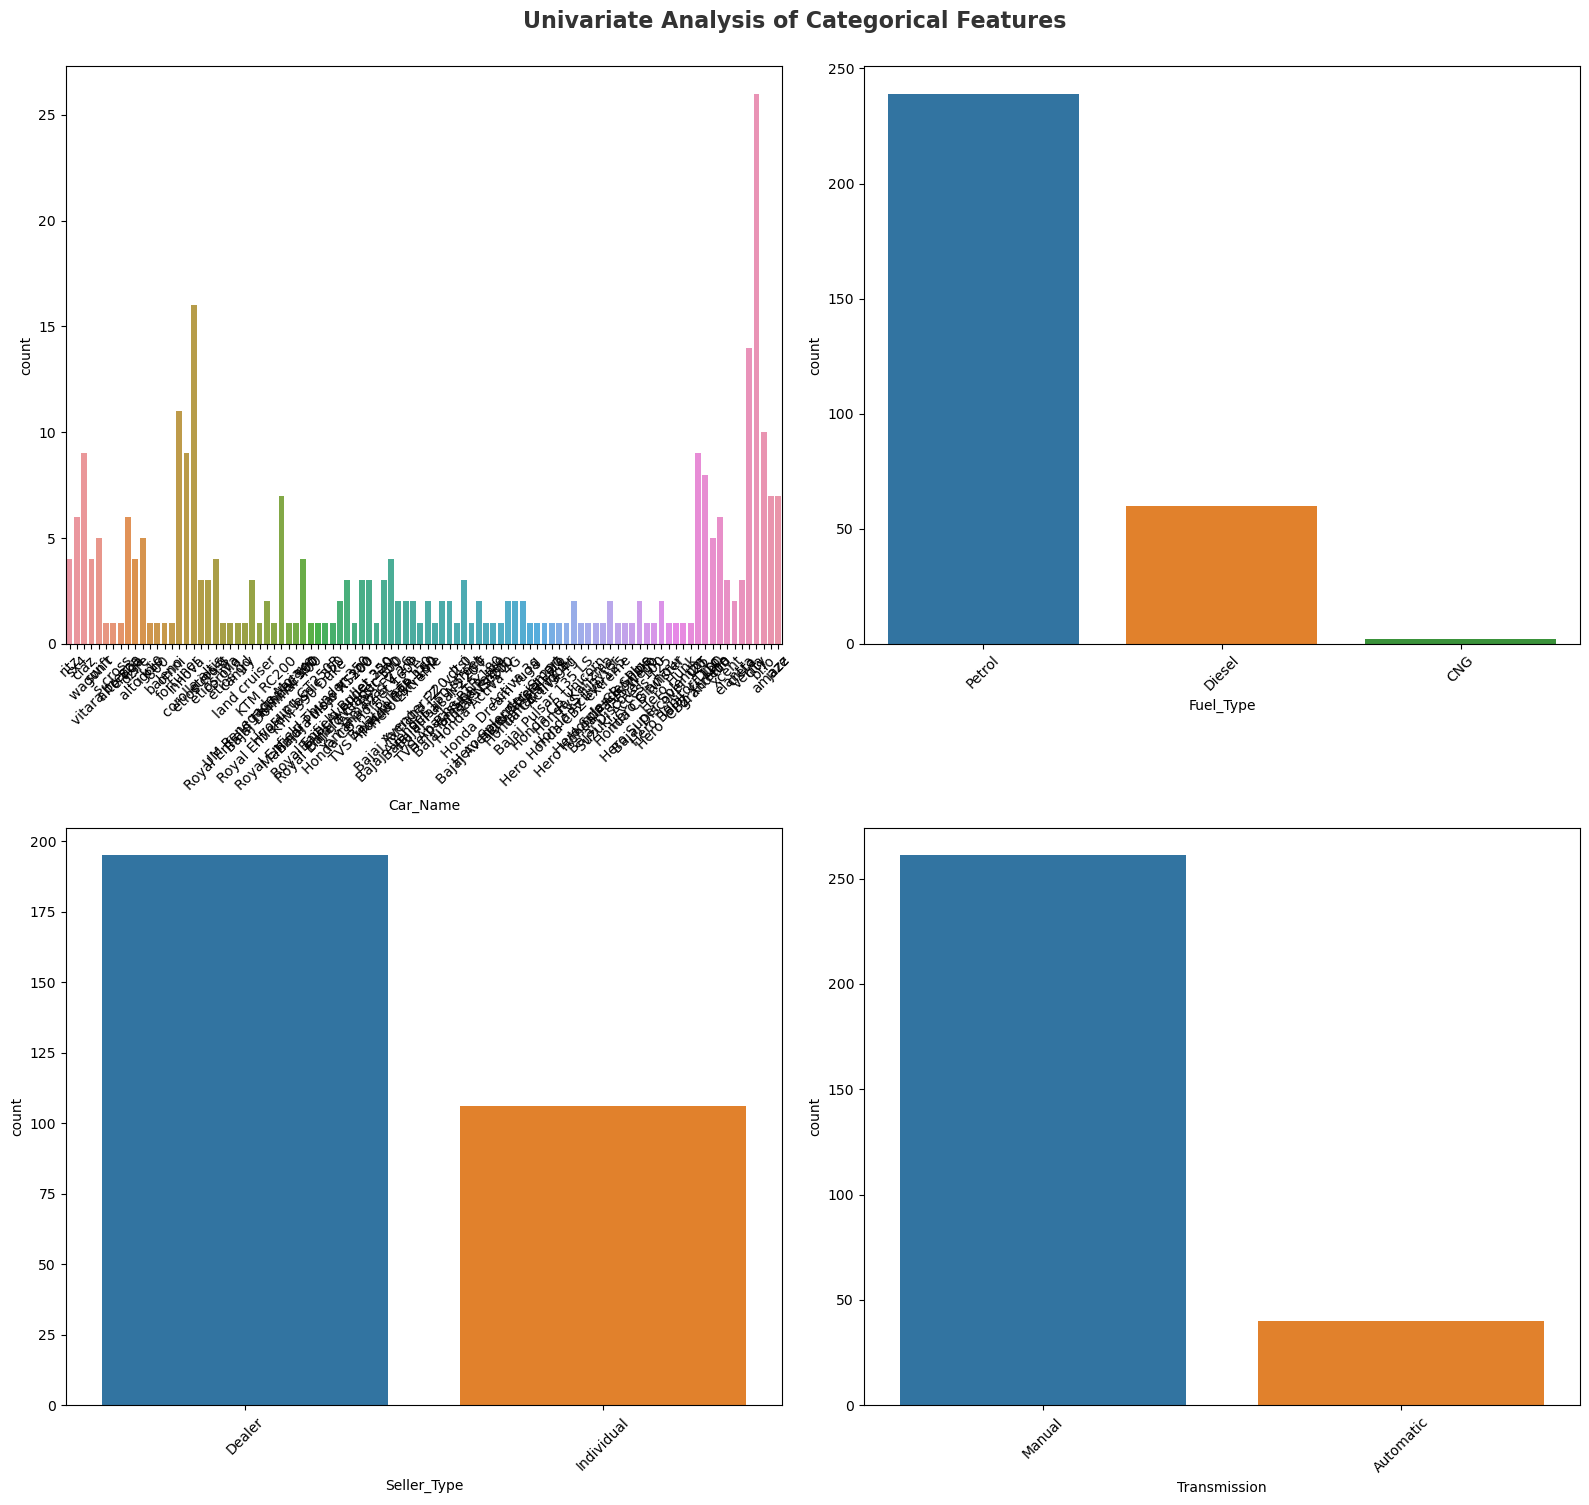

In [80]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (16,15))
plt.suptitle("Univariate Analysis of Categorical Features",fontsize=16,fontweight='bold',alpha=0.8,y=1)

for i in range(len(categorical_features)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
 [Text(0, 0, 'ritz'),
  Text(1, 0, 'sx4'),
  Text(2, 0, 'ciaz'),
  Text(3, 0, 'wagon r'),
  Text(4, 0, 'swift'),
  Text(5, 0, 'vitara brezza'),
  Text(6, 0, 's cross'),
  Text(7, 0, 'alto 800'),
  Text(8, 0, 'ertiga'),
  Text(9, 0, 'dzire'),
  Text(10, 0, 'alto k10'),
  Text(11, 0, 'ignis'),
  Text(12, 0, '800'),
  Text(13, 0, 'baleno'),
  Text(14, 0, 'omni'),
  Text(15, 0, 'fortuner'),
  Text(16, 0, 'innova'),
  Text(17, 0, 'corolla altis'),
  Text(18, 0, 'etios cross'),
  Text(19, 0, 'etios g'),
  Text(20, 0, 'etios liva'),
  Text(21, 0, 'corolla'),


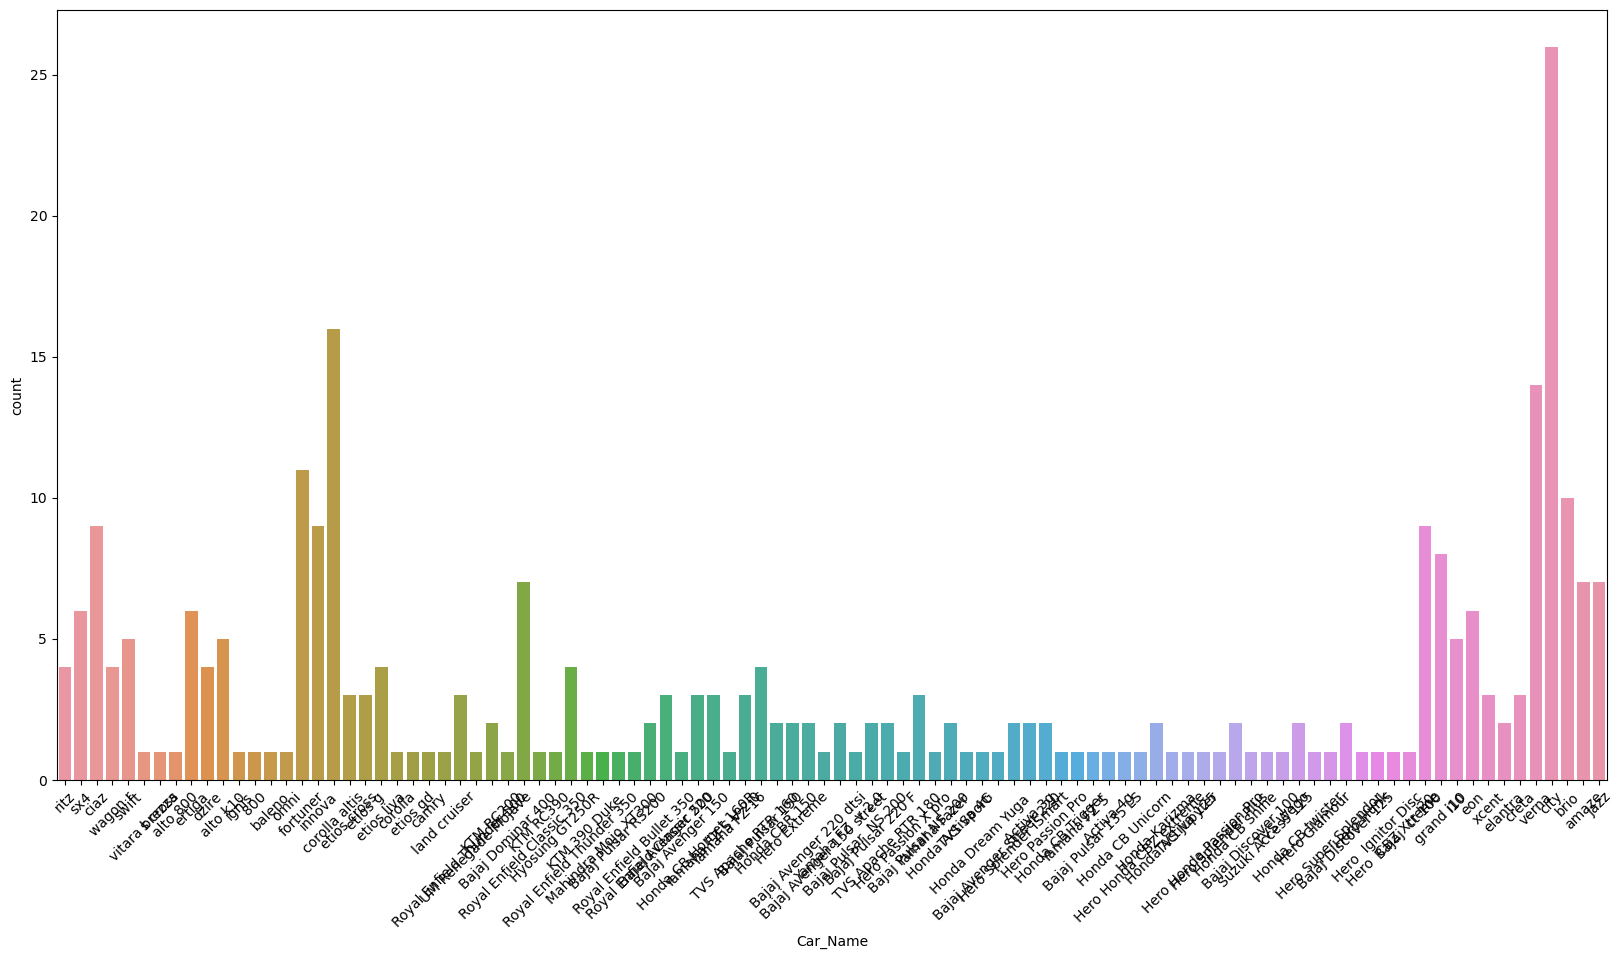

In [81]:
plt.figure(figsize = (20,10))
sns.countplot(x=df["Car_Name"])
plt.xticks(rotation=45)

### 4. Multivariate Analysis

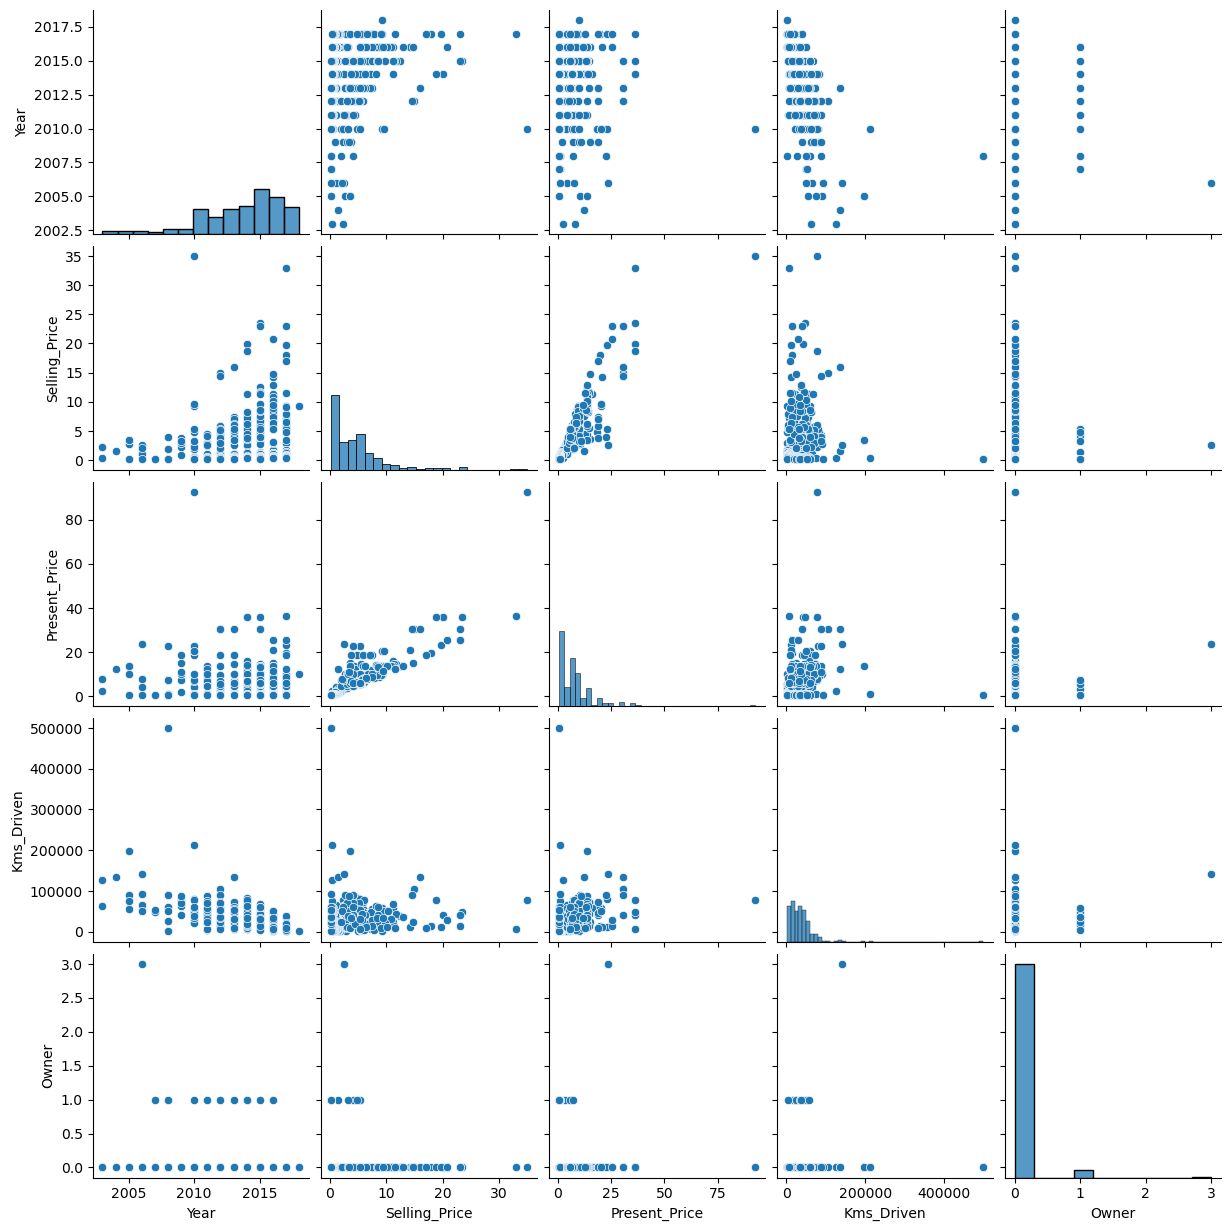

In [82]:
sns.pairplot(df)

In [83]:
df[numerical_features].corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


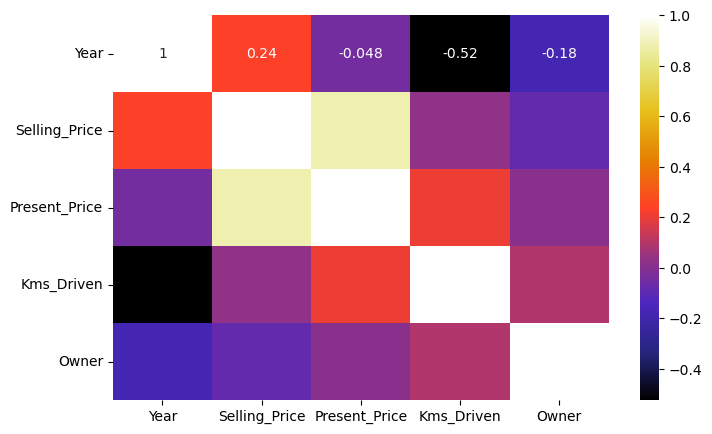

In [84]:
plt.figure(figsize=(8,5))
sns.heatmap(df[numerical_features].corr(),cmap='CMRmap',annot=True)
plt.show()

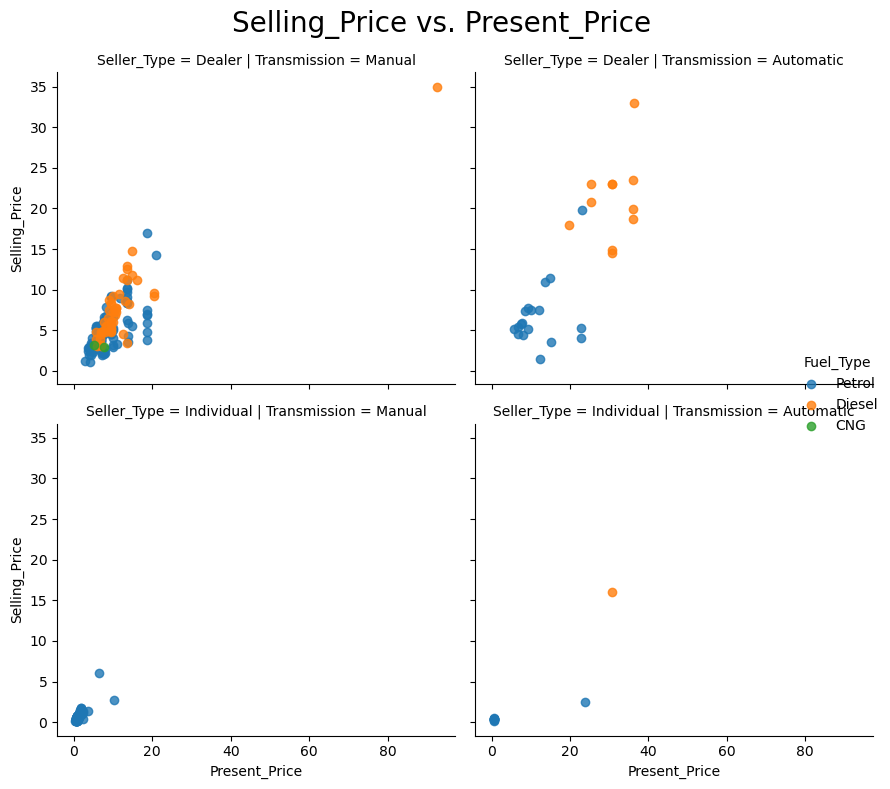

In [85]:
graph = sns.lmplot(x='Present_Price', y='Selling_Price', data= df, fit_reg=False, row='Seller_Type',
                   col='Transmission', hue='Fuel_Type', height=4, aspect=1)   

plt.suptitle('Selling_Price vs. Present_Price', fontsize=20)
plt.tight_layout()
plt.show()

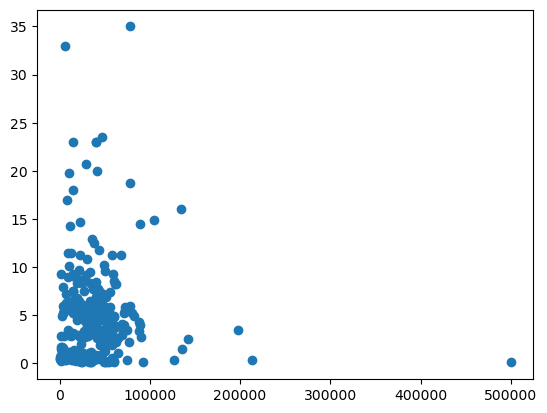

In [86]:
plt.scatter(df['Kms_Driven'],df['Selling_Price'])

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

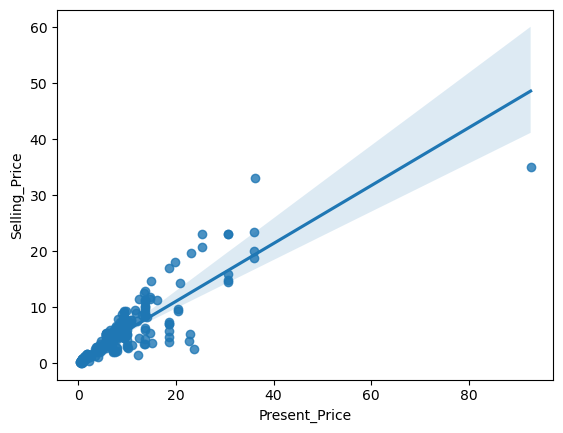

In [87]:
sns.regplot(x='Present_Price',y='Selling_Price',data=df)

In [88]:
categorical_features

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

### 5. Encoding Ctaegorical features

In [91]:
import pandas as pd

# Example categorical columns
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Create dummy variables with pd.get_dummies()
df = pd.get_dummies(df, columns=CatCols, drop_first=True)

# View the updated DataFrame
df.head()

KeyError: "None of [Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')] are in the [columns]"

In [92]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True


In [93]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [97]:
# List of columns to convert
cols_to_convert = ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']

# Convert specified columns to integer type and update the DataFrame
df[cols_to_convert] = df[cols_to_convert].astype(int)

# Now df has the updated columns with integer values
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


In [98]:
### again check correaltion

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car_Name                301 non-null    object 
 1   Year                    301 non-null    int64  
 2   Selling_Price           301 non-null    float64
 3   Present_Price           301 non-null    float64
 4   Kms_Driven              301 non-null    int64  
 5   Owner                   301 non-null    int64  
 6   Fuel_Type_Diesel        301 non-null    int32  
 7   Fuel_Type_Petrol        301 non-null    int32  
 8   Seller_Type_Individual  301 non-null    int32  
 9   Transmission_Manual     301 non-null    int32  
dtypes: float64(2), int32(4), int64(3), object(1)
memory usage: 18.9+ KB


In [107]:
## create a nee column Age based on year 

df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)
df.head()

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,ritz,3.35,5.59,27000,0,0,1,0,1
1,6,sx4,4.75,9.54,43000,0,1,0,0,1
2,2,ciaz,7.25,9.85,6900,0,0,1,0,1
3,8,wagon r,2.85,4.15,5200,0,0,1,0,1
4,5,swift,4.60,6.87,42450,0,1,0,0,1


In [108]:
num_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
num_cols

['Age',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

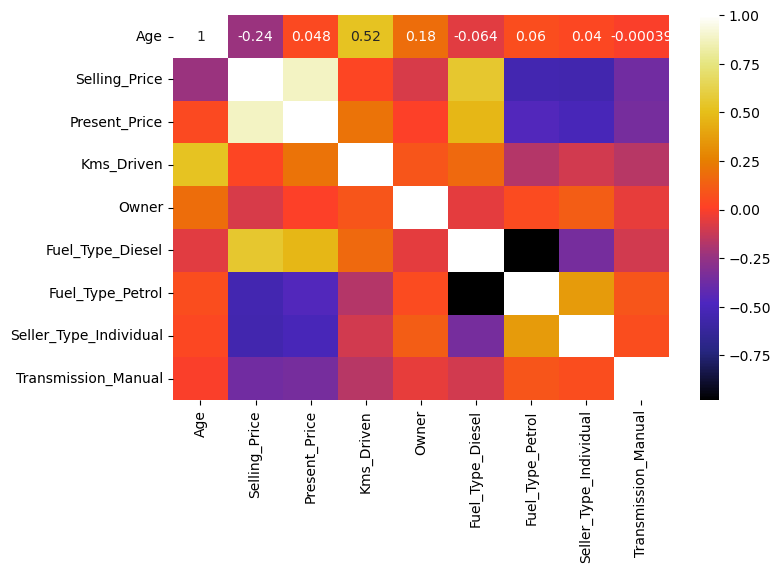

In [109]:
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(),cmap='CMRmap',annot=True)
plt.show()

In [110]:
df.drop("Car_Name", axis=1, inplace=True)

In [111]:
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


### 6. Splitting data into Train and Test Dataset and build the model

#### 6.1 Divide data to dependent and independent features

In [112]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [113]:
X.head()

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,5.59,27000,0,0,1,0,1
1,6,9.54,43000,0,1,0,0,1
2,2,9.85,6900,0,0,1,0,1
3,8,4.15,5200,0,0,1,0,1
4,5,6.87,42450,0,1,0,0,1


In [114]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

#### 6.2 Divide data to Training and test data

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [116]:
X_train

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
283,3,11.800,9010,0,0,1,0,1
24,6,4.410,56879,0,0,1,0,1
17,3,10.790,43000,0,1,0,0,1
81,4,7.850,40000,0,1,0,0,1
150,8,0.826,6000,0,0,1,1,1
...,...,...,...,...,...,...,...,...
252,4,6.820,31427,0,0,1,0,0
106,5,3.450,16500,1,0,1,1,1
45,5,12.040,15000,0,0,1,0,0
37,16,2.280,127000,0,0,1,1,1


In [117]:
X_test

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
198,8,0.57,35000,1,0,1,1,1
184,11,0.75,26000,1,0,1,1,1
158,2,0.54,8600,0,0,1,1,1
172,5,0.64,13700,0,0,1,1,1
70,5,6.76,71000,0,1,0,0,1
...,...,...,...,...,...,...,...,...
246,7,6.79,35000,0,0,1,0,1
47,13,4.15,65000,0,0,1,0,1
33,5,9.95,45000,0,1,0,0,1
177,3,0.57,24000,0,0,1,1,0


In [118]:
y_test

198    0.15
184    0.25
158    0.48
172    0.40
70     3.95
       ... 
246    3.75
47     1.05
33     6.00
177    0.35
25     3.00
Name: Selling_Price, Length: 100, dtype: float64

#### 6.3 Scale data using Standard Scaler

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
scaler

StandardScaler()

In [121]:
X_train = scaler.fit_transform(X_train)

In [122]:
X_test = scaler.transform(X_test) ### we use only transform for test data to avoid data leakage

In [123]:
X_train

array([[-0.77635416,  0.64651682, -0.91705323, ...,  0.46709937,
        -0.73902222,  0.38544964],
       [ 0.29246218, -0.42209169,  0.85236429, ...,  0.46709937,
        -0.73902222,  0.38544964],
       [-0.77635416,  0.50046883,  0.33934447, ..., -2.1408721 ,
        -0.73902222,  0.38544964],
       ...,
       [-0.06380993,  0.68122129, -0.6956404 , ...,  0.46709937,
        -0.73902222, -2.59437261],
       [ 3.85518333, -0.73009387,  3.44429907, ...,  0.46709937,
         1.35313928,  0.38544964],
       [-0.42008205,  0.37755717, -0.6956404 , ...,  0.46709937,
        -0.73902222, -2.59437261]])

In [124]:
X_test

array([[ 1.00500641e+00, -9.77363232e-01,  4.36345059e-02,
         6.26099034e+00, -4.51212604e-01,  4.67099366e-01,
         1.35313928e+00,  3.85449645e-01],
       [ 2.07382276e+00, -9.51334879e-01, -2.89039201e-01,
         6.26099034e+00, -4.51212604e-01,  4.67099366e-01,
         1.35313928e+00,  3.85449645e-01],
       [-1.13262627e+00, -9.81701291e-01, -9.32208368e-01,
        -1.59719141e-01, -4.51212604e-01,  4.67099366e-01,
         1.35313928e+00,  3.85449645e-01],
       [-6.38099310e-02, -9.67241095e-01, -7.43693267e-01,
        -1.59719141e-01, -4.51212604e-01,  4.67099366e-01,
         1.35313928e+00,  3.85449645e-01],
       [-6.38099310e-02, -8.22770784e-02,  1.37432933e+00,
        -1.59719141e-01,  2.21625015e+00, -2.14087210e+00,
        -7.39022223e-01,  3.85449645e-01],
       [ 2.92462184e-01, -9.65795075e-01, -3.62966691e-01,
         6.26099034e+00, -4.51212604e-01,  4.67099366e-01,
         1.35313928e+00,  3.85449645e-01],
       [ 1.36127853e+00, -9.079542

#### 6.4 Model Building

In [125]:
from sklearn.linear_model import Ridge

In [126]:
regression = Ridge()

In [127]:
regression

Ridge()

In [128]:
regression.fit(X_train,y_train)

Ridge()

#### 6.5 print coefficients and intercept

In [129]:
print(regression.coef_)

[-0.85233218  3.77258098 -0.77169229 -0.03417765  0.77723532  0.0827847
 -0.38241    -0.22954862]


In [130]:
print(regression.intercept_)

4.5924875621890555


### 7. Prediction for the Test Data

In [131]:
## prediction for the test data
reg_pred = regression.predict(X_test)

In [132]:
reg_pred

array([ -1.11691514,  -1.6729859 ,   1.66118748,   0.65927752,
         5.02082385,  -0.15217794,  -6.01666713,   1.54500059,
         9.32423156,   2.28115579,   6.4493946 ,   4.45037071,
         4.61438804,   4.7860025 ,   6.33184375,   1.8105124 ,
         5.05077242, -14.41567525,  -1.33965549,   6.72282055,
         1.46771935,  21.43442588,   4.65235116,   0.93847784,
         1.30732986,  -0.34627289,   4.09711408,   5.85367918,
        50.43416403,  11.14266977,   7.19206615,  -1.92007747,
         4.99469535,   5.86611371,  10.35976785,   8.23708067,
        -0.17482215,   0.49546561,   0.41140794,   5.17104326,
         7.97186722,   5.86231228,   0.78768276,   4.89871606,
         9.14143465,   6.89898193,   5.7693715 ,   4.04774147,
         9.33422196,   6.87463277,   5.94559794,   1.70732411,
         1.35499007,  24.54647743,  -2.63271474,   8.04091847,
         2.56483381,   6.79177076,   4.67265615,   4.2174259 ,
        10.18898203,   7.77552206,  22.62235182,   4.26

### 8. Assumptions of Regression

#### 8.1 Scatter plot b/w original and predicted test points

The scatter plot b/w original test and predicted test points should show more or less linear relation

Text(0, 0.5, 'Test Predicted Data')

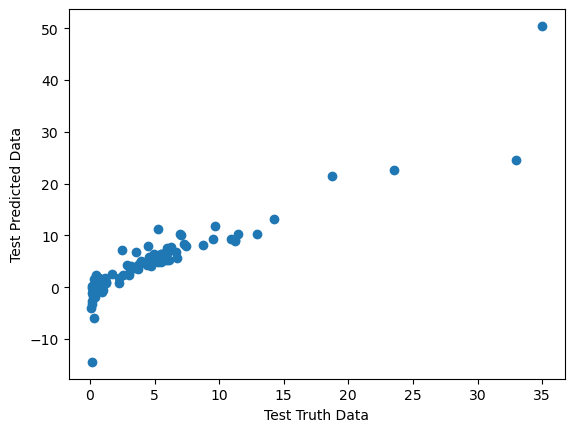

In [133]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

#### 8.2 Kde plot of residuals

KDE plot for residuals should be something like gaussian curve

In [134]:
### residuals
residuals = y_test-reg_pred
residuals

198    1.266915
184    1.922986
158   -1.181187
172   -0.259278
70    -1.070824
         ...   
246    0.150594
47     1.568486
33    -1.502682
177   -1.268626
25     0.258327
Name: Selling_Price, Length: 100, dtype: float64

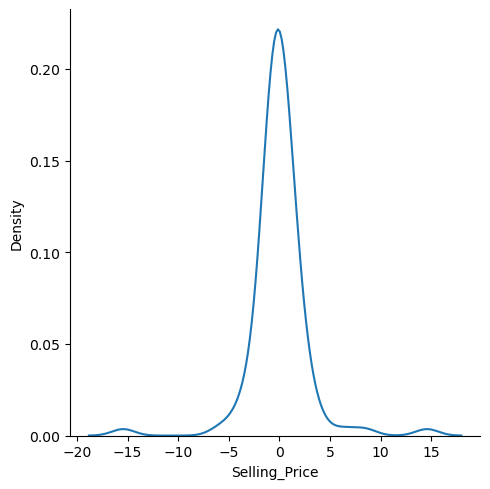

In [135]:
sns.displot(residuals,kind='kde')

### 8.3 Scatter plot with Predictions and Residuals

The scatter plot with predictions and residuals should be uniformly distriubuted

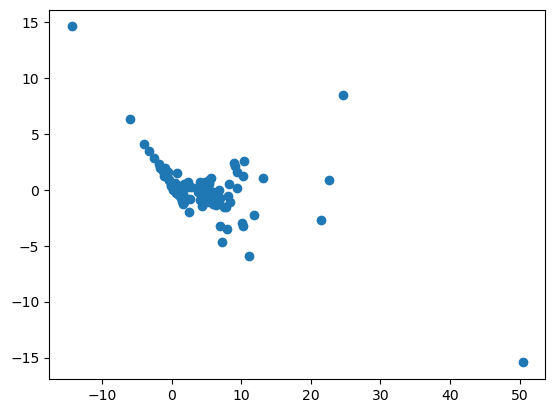

In [136]:
plt.scatter(reg_pred,residuals)

### 9. Performance Metrics

In [137]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred))) ### this is root mean squared error

7.994076352185208
1.5494014719316436
2.827379767945086


### 10. R square and adjusted r square

In [138]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.762376321380279


In [139]:
#### adjusted r square

1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.7414863276554684